# Importing Necessary Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


# Loading the Excel file

In [2]:
df=pd.read_excel(r'D:\Christ\Assignment\Naveen_Assignment\Data\data.xlsx',parse_dates=['Week_Ending'],thousands=',',decimal='.')
df1=df.copy()
df

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
0,Brand A,2022-02-05,FY_2022,MAT_2022,5.549708e+07,0.039253,0.015600,0,29882443.5,1070.8565,17.716258,534418.5,46008.276537,2662747.5,11599332.5,8.152210e+05,280464068.5,3.861346e+06,6779.5,671.943906
1,Brand A,2022-02-12,FY_2022,MAT_2022,5.773779e+07,0.037425,0.014623,0,29719511.5,1070.8565,17.720041,631368.5,54354.736119,2609978.0,13142160.5,9.236536e+05,235058652.5,3.236218e+06,5110.0,506.472949
2,Brand A,2022-02-19,FY_2022,MAT_2022,5.404445e+07,0.061313,0.010034,0,29353173.5,1070.8565,17.774548,638092.0,54933.564597,2401283.5,12949660.5,9.101243e+05,257480818.0,3.544920e+06,2842.0,281.682216
3,Brand A,2022-02-26,FY_2022,MAT_2022,5.577581e+07,0.066293,0.023455,0,29324354.5,1070.8565,17.771519,538643.0,46371.965227,2396597.0,12401567.5,8.716034e+05,276892035.0,3.812168e+06,3031.0,300.414777
4,Brand A,2022-03-05,FY_2022,MAT_2022,5.839206e+07,0.047306,0.015688,0,29192688.0,1282.7465,17.842527,639628.5,55065.842423,2427106.5,8857677.5,6.225327e+05,193081850.5,2.658294e+06,3395.0,336.492302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Brand A,2024-05-04,FY_2024,MAT_2024,4.329954e+07,0.072005,0.048122,0,24330285.0,1128.5190,18.646429,422376.5,36362.541369,1557787.0,17464296.5,1.227421e+06,99109724.0,1.364513e+06,0.0,0.000000
118,Brand A,2024-05-11,FY_2024,MAT_2024,4.231364e+07,0.052595,0.342303,0,24294714.5,1123.4335,18.697309,273955.5,23584.925302,1554808.5,11039213.5,7.758548e+05,94435820.5,1.300164e+06,0.0,0.000000
119,Brand A,2024-05-18,FY_2024,MAT_2024,4.011042e+07,0.051634,0.136933,0,24298113.0,1123.4335,18.695423,289660.0,24936.931228,1517523.0,10867983.0,7.638205e+05,90986511.0,1.252675e+06,0.0,0.000000
120,Brand A,2024-05-25,FY_2024,MAT_2024,3.783654e+07,0.058609,0.137453,0,24399693.5,1123.4335,18.709714,237674.5,20461.481258,1427023.5,10679399.5,7.505665e+05,97938928.5,1.348394e+06,0.0,0.000000


# Data Exploration

In [60]:
print(f'The shape of the data is {df.shape}')
print(f'The size of the data is {df.size}')
print(f'The columns of the data are {df.columns}')

The shape of the data is (122, 20)
The size of the data is 2440
The columns of the data are Index(['Department', 'Week_Ending', 'Year', 'MAT', 'Sales', 'Discount1',
       'Discount2', 'Holiday Dummy', 'Total SKU', 'Gasoline Price',
       'Average Price', 'Email Clicks', 'Email Spends',
       'Organic Search Impressions', 'Modular Video Impressions',
       'Modular Video Spends', 'Paid Social Impressions', 'Paid Social Spends',
       'Paid Search Impressions', 'Paid Search Spends'],
      dtype='object')


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Department                  122 non-null    object        
 1   Week_Ending                 122 non-null    datetime64[ns]
 2   Year                        122 non-null    object        
 3   MAT                         122 non-null    object        
 4   Sales                       122 non-null    float64       
 5   Discount1                   122 non-null    float64       
 6   Discount2                   122 non-null    float64       
 7   Holiday Dummy               122 non-null    int64         
 8   Total SKU                   122 non-null    float64       
 9   Gasoline Price              122 non-null    float64       
 10  Average Price               122 non-null    float64       
 11  Email Clicks                122 non-null    float64       

In [62]:
df.describe(include='float64')

,Sales,Discount1,Discount2,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
count,1.220000e+02,122.000000,122.000000,1.220000e+02,122.000000,122.000000,1.220000e+02,122.000000,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,1.220000e+02,122.000000,122.000000
mean,4.716817e+07,0.045865,0.048454,2.733039e+07,1141.034570,18.232506,4.383132e+05,37734.537898,1.973459e+06,1.342260e+07,9.433634e+05,2.028083e+08,2.792205e+06,1522.872951,150.938152
std,4.904374e+06,0.020532,0.066932,1.986457e+06,128.779133,0.235631,1.746694e+05,15037.350764,3.844069e+05,6.033649e+06,4.240552e+05,7.892941e+07,1.086677e+06,2051.580642,203.340528
min,3.158512e+07,0.013620,0.002513,2.377588e+07,966.010500,17.716258,1.655045e+05,14248.340587,8.734215e+05,1.924108e+06,1.352296e+05,6.940367e+07,9.555292e+05,0.000000,0.000000
25%,4.444759e+07,0.032922,0.007754,2.590976e+07,1051.745625,18.051530,3.169416e+05,27285.615915,1.708429e+06,9.235256e+06,6.490696e+05,1.399515e+08,1.926810e+06,0.000000,0.000000
50%,4.692418e+07,0.041603,0.017871,2.687210e+07,1114.687000,18.210772,4.256770e+05,36646.682574,1.943811e+06,1.191968e+07,8.377356e+05,1.858422e+08,2.558620e+06,490.000000,48.565899
75%,5.047277e+07,0.057146,0.057452,2.925184e+07,1186.125500,18.414389,5.104199e+05,43942.226474,2.220258e+06,1.749417e+07,1.229520e+06,2.727134e+08,3.754638e+06,2648.625000,262.516030
max,5.839206e+07,0.178189,0.342303,3.109905e+07,1505.497000,18.709714,1.254225e+06,107976.671165,3.125528e+06,3.799969e+07,2.670683e+06,3.689925e+08,5.080180e+06,10363.500000,1027.168769


In [63]:
df.describe(include='object')

,Department,Year,MAT
count,122,122,122
unique,1,3,3
top,Brand A,FY_2023,MAT_2023
freq,122,53,52


In [64]:
# There are missing values in the columns like paid Search Impressions, paid Search Spends
df.isnull().sum()

Department                    0
Week_Ending                   0
Year                          0
MAT                           0
Sales                         0
Discount1                     0
Discount2                     0
Holiday Dummy                 0
Total SKU                     0
Gasoline Price                0
Average Price                 0
Email Clicks                  0
Email Spends                  0
Organic Search Impressions    0
Modular Video Impressions     0
Modular Video Spends          0
Paid Social Impressions       0
Paid Social Spends            0
Paid Search Impressions       0
Paid Search Spends            0
dtype: int64

In [65]:
# There are no duplicate values in the dataset.
df.duplicated().sum()

0

# Exploratory Data Analysis

### 1) Sales Time Series Trend & Seasonality

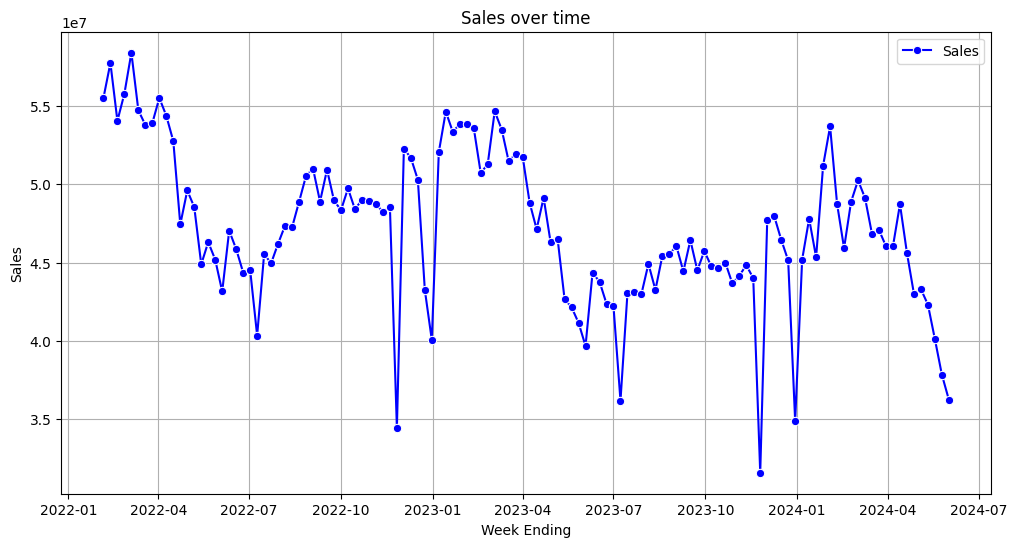

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Week_Ending',y='Sales',marker='o',color='blue')
plt.title('Sales over time')
plt.xlabel('Week Ending')
plt.ylabel('Sales')
plt.legend(['Sales'])
plt.grid(True)

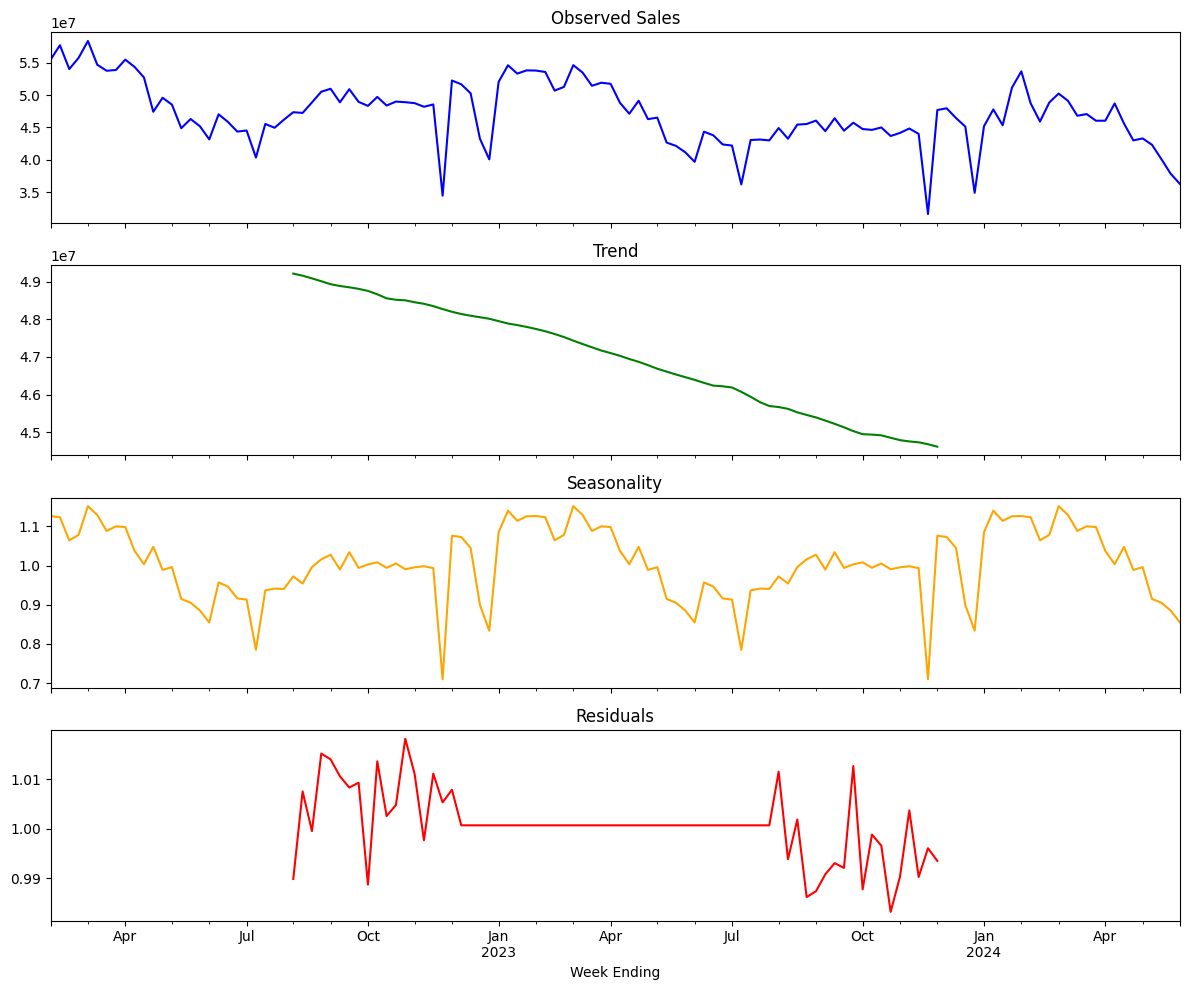

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

sales_decomposition = seasonal_decompose(df.set_index("Week_Ending")["Sales"], model="multiplicative", period=52)
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
sales_decomposition.observed.plot(ax=axes[0], title="Observed Sales", color="blue")
sales_decomposition.trend.plot(ax=axes[1], title="Trend", color="green")
sales_decomposition.seasonal.plot(ax=axes[2], title="Seasonality", color="orange")
sales_decomposition.resid.plot(ax=axes[3], title="Residuals", color="red")
plt.xlabel("Week Ending")
plt.tight_layout()
plt.show()

### Trend: The negative value of slope -63,471.23 indicates that, on average, Sales decrease by about 63,471 dollars per time step (week).

* **Root Cause Analysis:** This steep negative trend indicates potential issues like market saturation, increased competition, shifting consumer preferences.
* **Resource Allocation:** Reallocate marketing budgets to focus on customer retention and acquisition efforts, or pivot to product/service improvements.

In [16]:
from sklearn.linear_model import LinearRegression

df1['time_index'] = np.arange(len(df1))
trend_model = LinearRegression().fit(df1[['time_index']], df1['Sales'])
trend_slope = trend_model.coef_[0] 
print(f'The slope of the trend line is: {trend_slope}')

The slope of the trend line is: -63471.2307783831


### Seasonality: Based on the dominant frequency of 0.04098... cycles/week found in the data, the strongest cyclical component repeats approximately every 24.4 weeks. 

* **Promotional Timing:** Align marketing campaigns and promotions with the peaks of this seasonal cycle.
* **Pricing Strategies:** Should consider seasonal pricing adjustments (discounts during low sales periods, premium pricing during peaks) to maximize revenue.

In [11]:
from scipy.signal import periodogram
frequencies, spectrum = periodogram(df1['Sales'], detrend='linear')
dominant_frequency = frequencies[np.argmax(spectrum)]
period=1/dominant_frequency
print(f'The period of the dominant frequency is: {period} weeks')

The period of the dominant frequency is: 24.4 weeks


* **Residual:** The residual analysis indicates a good overall fit of the multiplicative model (mean residual close to 1) with a reasonable level of unexplained variability (standard deviation of 0.0610), but highlights the presence of some larger deviations (up to 1.20) suggesting potential outliers or uncaptured factors in the sales data.

In [12]:
residuals = sales_decomposition.resid.dropna()
residual_stats = {
    'Mean': residuals.mean(),
    'StdDev': residuals.std(),
    'Max_Deviation': np.abs(residuals).max()
}
residual_stats

{'Mean': 1.0006582033041111,
 'StdDev': 0.00706370524057349,
 'Max_Deviation': 1.0181517157071192}

# 2) Marketing Spend Analysis


In [20]:
total_spend=df[['Paid Search Spends', 'Paid Social Spends', 'Modular Video Spends', 'Email Spends']].sum(axis=0).sum()
print(f'The total amount spent on all channels is: {total_spend}')

The total amount spent on all channels is: 460361362.3531999


In [21]:
total_sales=df['Sales'].sum()
print(f'The total sales is: {total_sales}')

The total sales is: 5754517029.415001


* The total sales is approximately 12.5 times the total spend, indicating a significant return on investment (ROI). But there may be other reasons why the sales is high.

In [22]:
return_on_investment=total_sales/total_spend
print(f'The return on investment is: {return_on_investment:.2f}')

The return on investment is: 12.50


* The marketing budget is heavily skewed towards Paid Social Spends (74%) and Modular Video Spends (25%), with minimal allocation towards Email Marketing (1%) and almost no investment in Paid Search Spends (0.004%).

In [23]:
channels=['Paid Search Spends','Email Spends', 'Paid Social Spends', 'Modular Video Spends', ]
total_spend_per_channel=df[channels].sum(axis=0)
total_spend_per_channel

Paid Search Spends      1.841445e+04
Email Spends            4.603614e+06
Paid Social Spends      3.406490e+08
Modular Video Spends    1.150903e+08
dtype: float64

In [24]:
import plotly.express as px

fig = px.pie(total_spend_per_channel, values=total_spend_per_channel.values, names=total_spend_per_channel.index, title='Spend Channel-wise')
fig.show()

In [25]:
mean_spend=df[['Paid Search Spends', 'Paid Social Spends', 'Modular Video Spends', 'Email Spends']].mean(axis=0)
mean_spend

Paid Search Spends      1.509382e+02
Paid Social Spends      2.792205e+06
Modular Video Spends    9.433634e+05
Email Spends            3.773454e+04
dtype: float64

# 3) Rolling Statistics (Mean & Std Dev)

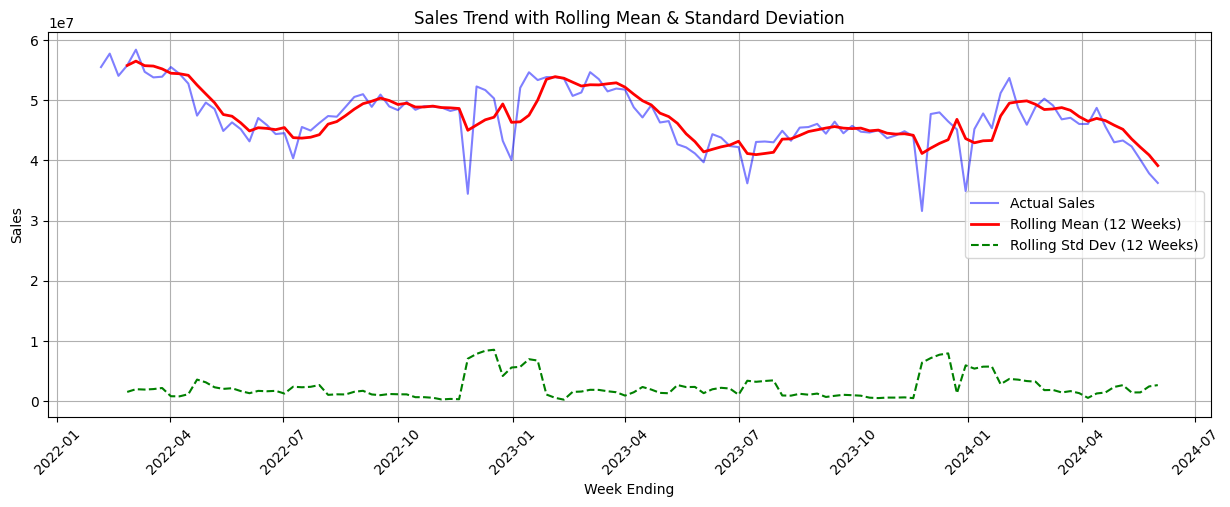

In [26]:
window_size = 4
df1["Sales_Rolling_Mean"] = df["Sales"].rolling(window=window_size).mean()
df1["Sales_Rolling_Std"] = df["Sales"].rolling(window=window_size).std()

plt.figure(figsize=(15, 5))
plt.plot(df1["Week_Ending"], df1["Sales"], label="Actual Sales", alpha=0.5, color="blue")
plt.plot(df1["Week_Ending"], df1["Sales_Rolling_Mean"], label="Rolling Mean (12 Weeks)", color="red", linewidth=2)
plt.plot(df1["Week_Ending"], df1["Sales_Rolling_Std"], label="Rolling Std Dev (12 Weeks)", color="green", linestyle="dashed")
plt.xlabel("Week Ending")
plt.ylabel("Sales")
plt.title("Sales Trend with Rolling Mean & Standard Deviation")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

* The rolling mean decreased by 0.27% weekly on average
* We need to investigate whether this is due to seasonality or requires strategy adjustment.

In [27]:
mean_trend = df1["Sales_Rolling_Mean"].pct_change().mean()
print(f"Average Trend Direction: {'Upward' if mean_trend > 0 else 'Downward'} ({mean_trend:.2%} weekly change)")

Average Trend Direction: Downward (-0.27% weekly change)


* Sales variability fluctuates dramatically between periods.
* Also suggets that November, December, January months high sales volatality. We must align marketing flexibility with volatile periods.

In [28]:
volatility_ratio = df1["Sales_Rolling_Std"].max() / df1["Sales_Rolling_Std"].min()
print(f"Volatility Range is {volatility_ratio:.1f}x from the calmest to the most volatile period.")

Volatility Range is 36.6x from the calmest to the most volatile period.


Text(0, 0.5, 'Sales Rolling Standard Deviation')

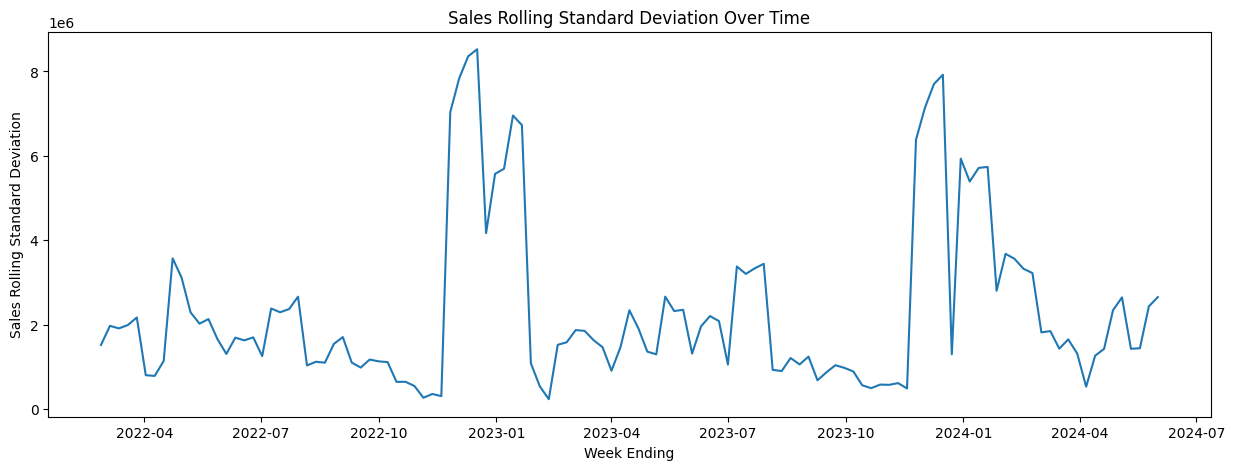

In [29]:
plt.figure(figsize=(15, 5))

sns.lineplot(data=df1, x='Week_Ending', y='Sales_Rolling_Std')
plt.title('Sales Rolling Standard Deviation Over Time')
plt.xlabel('Week Ending')
plt.ylabel('Sales Rolling Standard Deviation')

# 4) Distribution Anaysis of Sales and Marketing Spends

* **Sales:** Consistent performance with a slight left skew and moderate leptokurtosis indicates stable sales with a few lower-than-average periods.
* **Paid Social Spends:** A mild right skew and platykurtic distribution show stable, predictable spending without extreme values.
* **Email Spends:** High right skew and leptokurtosis reveal sporadic, unusually high spending events.
* **Modular Video Spends:** Moderately right skewed and leptokurtic, suggesting occasional high spend spikes.

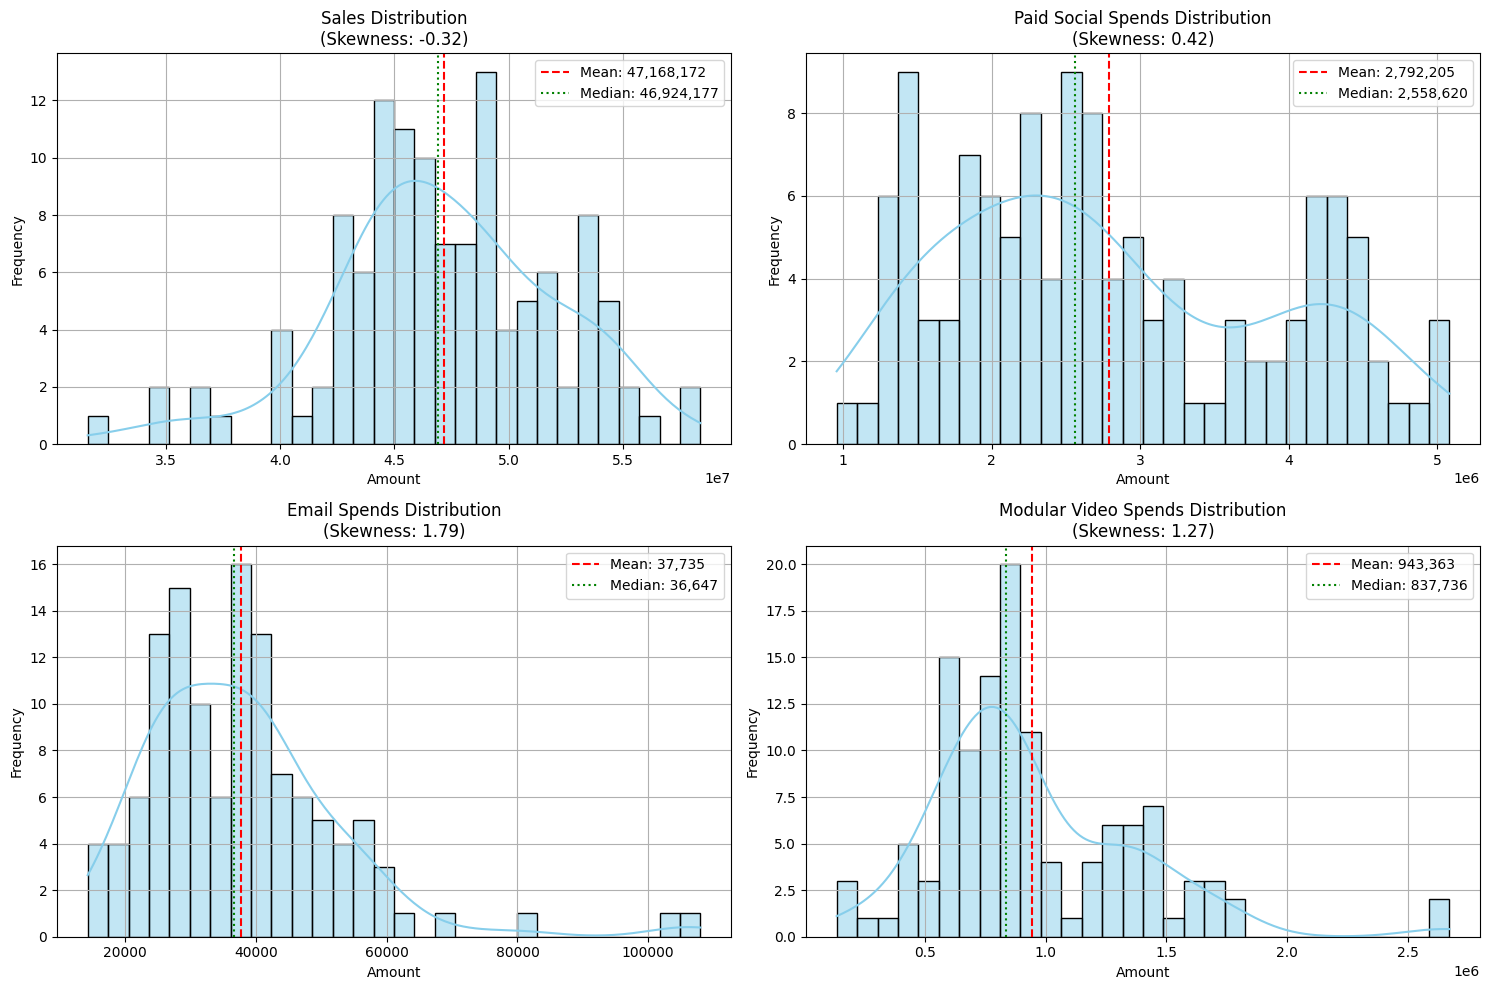

In [30]:
numeric_cols = ['Sales', 'Paid Social Spends', 'Email Spends', 'Modular Video Spends']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.axvline(df[col].mean(), color='r', linestyle='--', label=f'Mean: {df[col].mean():,.0f}')
    plt.axvline(df[col].median(), color='g', linestyle=':', label=f'Median: {df[col].median():,.0f}')

    plt.title(f'{col} Distribution\n(Skewness: {df[col].skew():.2f})')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [31]:
print("\nDistribution Characteristics:")

for col in numeric_cols:
    skew = df[col].skew()
    kurtosis=df[col].kurtosis()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    outliers = df[(df[col] < (df[col].quantile(0.25) - 1.5*iqr)) | (df[col] > (df[col].quantile(0.75) + 1.5*iqr))]
    
    print(f"""
    {col}:
    - Skewness: {skew:.2f} ({'Right' if skew > 0 else 'Left'} skewed)
    - Kurtosis: {kurtosis:.2f} ({'Leptokurtic' if kurtosis > 0 else 'Platykurtic'})
    - Outliers: {len(outliers)} instances
    - 95% Range: {df[col].quantile(0.05):,.0f} to {df[col].quantile(0.95):,.0f}""")


Distribution Characteristics:

    Sales:
    - Skewness: -0.32 (Left skewed)
    - Kurtosis: 0.53 (Leptokurtic)
    - Outliers: 3 instances
    - 95% Range: 39,695,867 to 54,652,843

    Paid Social Spends:
    - Skewness: 0.42 (Right skewed)
    - Kurtosis: -0.96 (Platykurtic)
    - Outliers: 0 instances
    - 95% Range: 1,356,472 to 4,536,938

    Email Spends:
    - Skewness: 1.79 (Right skewed)
    - Kurtosis: 5.88 (Leptokurtic)
    - Outliers: 4 instances
    - 95% Range: 19,810 to 60,387

    Modular Video Spends:
    - Skewness: 1.27 (Right skewed)
    - Kurtosis: 2.97 (Leptokurtic)
    - Outliers: 2 instances
    - 95% Range: 455,353 to 1,669,684


# 5) Correlation Heatmap

* The strongest drivers of sales are Paid Search and Organic Search Impressions, with correlation coefficients of 0.55 and 0.56, respectively. This indicates a strong positive relationship between these channels and sales.
*  In contrast, Paid Social has a relatively weaker impact, with a correlation coefficient of 0.39 for both impressions and spends. Meanwhile, Modular Video appears to have a negligible effect on sales, with a correlation coefficient of just 0.058.

In [96]:
num_all=['Sales','Organic Search Impressions','Modular Video Impressions','Modular Video Spends','Paid Social Impressions','Paid Social Spends','Paid Search Impressions','Paid Search Spends','Average Price','Total SKU']

<Axes: >

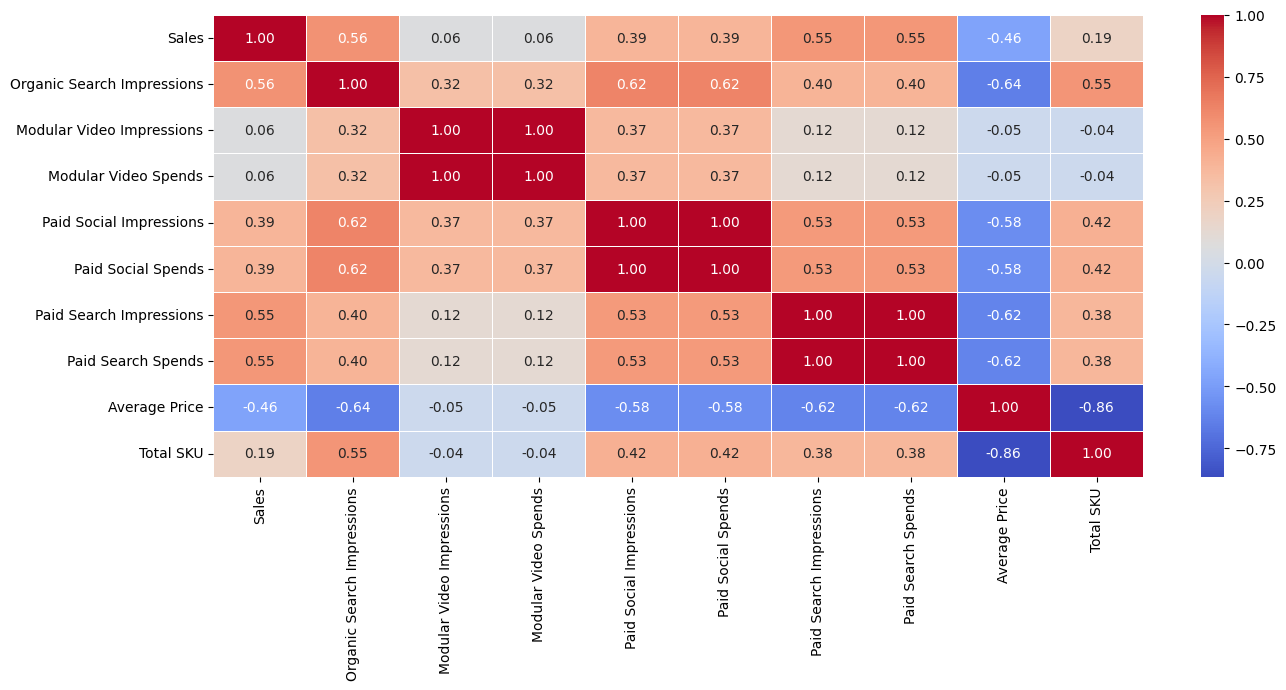

In [97]:
plt.figure(figsize=(15,6))
correlation_matrix=df[num_all].corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)

# 6) Missing Value and Outlier Detection

* In marketing mix modeling, the missing values in the Paid Search Impressions and Paid Search Spends columns indicate that there was no activity for those weeks (rather than a data collection error), the appropriate approach is to impute them as 0.
* Also for the Holiday Dummy column, if data for a particular row are missing, it often means that there was no holiday or event scheduled, so we can impute it with 0.

### Creating interaction terms:

* Interaction terms are new variables created by multiplying two or more existing variables in a model.
* Without interaction terms, the model assumes the effect of Paid Social Spends is the same regardless of holidays.
  
* With interaction terms, the model can differentiate:
    * Effect of Paid Social Spends on non-holidays.
    * Effect of Paid Social Spends during holidays.

In [67]:
# Outlier detection using IQR method
def detect_outliers_iqr(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    return outliers

outliers_sales = detect_outliers_iqr(df, "Sales")
outliers_sales

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Organic Search Impressions,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends
42,Brand A,2022-11-26,FY_2022,MAT_2023,3.444005e+07,0.049173,0.005968,1,29370250.0,1143.2715,18.114693,1254225.0,107976.671165,2032915.5,11470452.0,8.061630e+05,207948002.5,2.862967e+06,1631.0,161.655065
94,Brand A,2023-11-25,FY_2023,MAT_2024,3.158512e+07,0.039243,0.022613,1,26526125.5,1041.5930,18.396413,708057.0,60956.876043,1404945.5,37999692.5,2.670683e+06,69403666.5,9.555292e+05,0.0,0.000000
99,Brand A,2023-12-30,FY_2023,MAT_2024,3.488112e+07,0.048346,0.003681,0,25882622.5,981.0115,18.436381,331506.0,28539.468079,1319136.0,13831520.5,9.721030e+05,118145272.0,1.626589e+06,0.0,0.000000


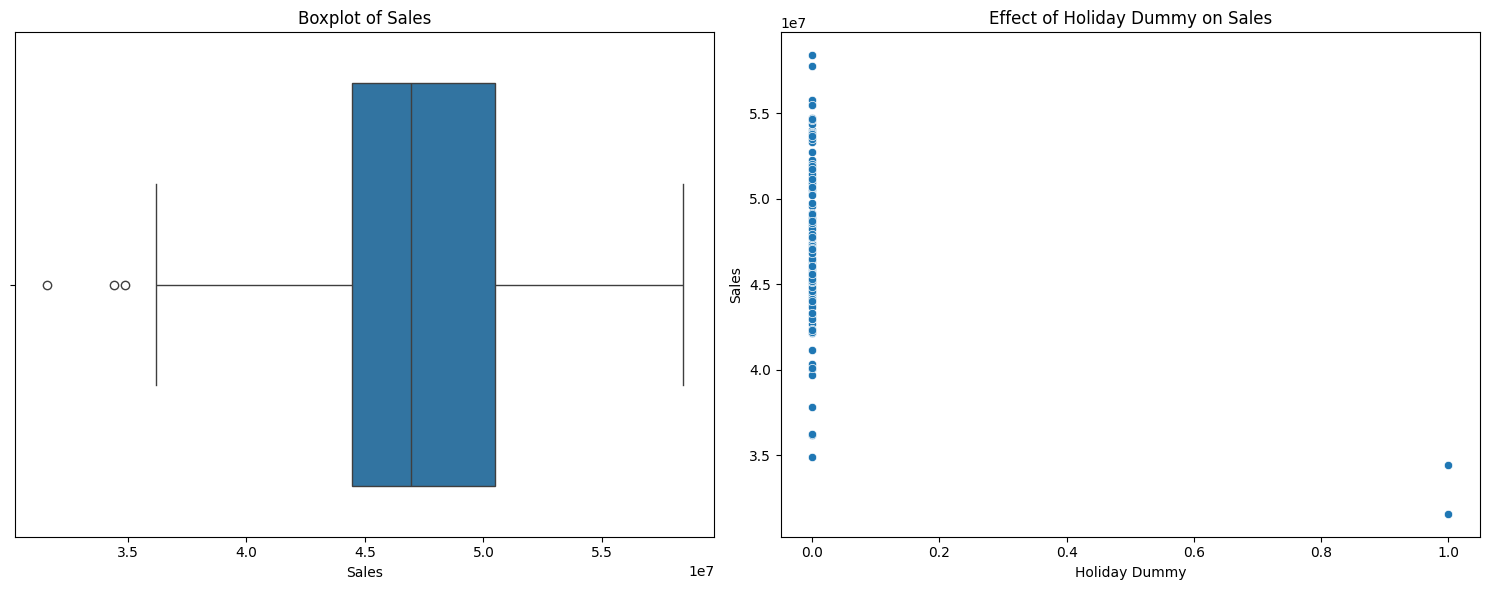

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6)) 

sns.boxplot(ax=axes[0], data=df, x='Sales')
axes[0].set_title('Boxplot of Sales')

sns.scatterplot(ax=axes[1], data=df, x='Holiday Dummy', y='Sales')
axes[1].set_title('Effect of Holiday Dummy on Sales')
axes[1].set_xlabel('Holiday Dummy')
axes[1].set_ylabel('Sales')

plt.tight_layout() 
plt.show()

# 7) Checking for Diminshing Effect

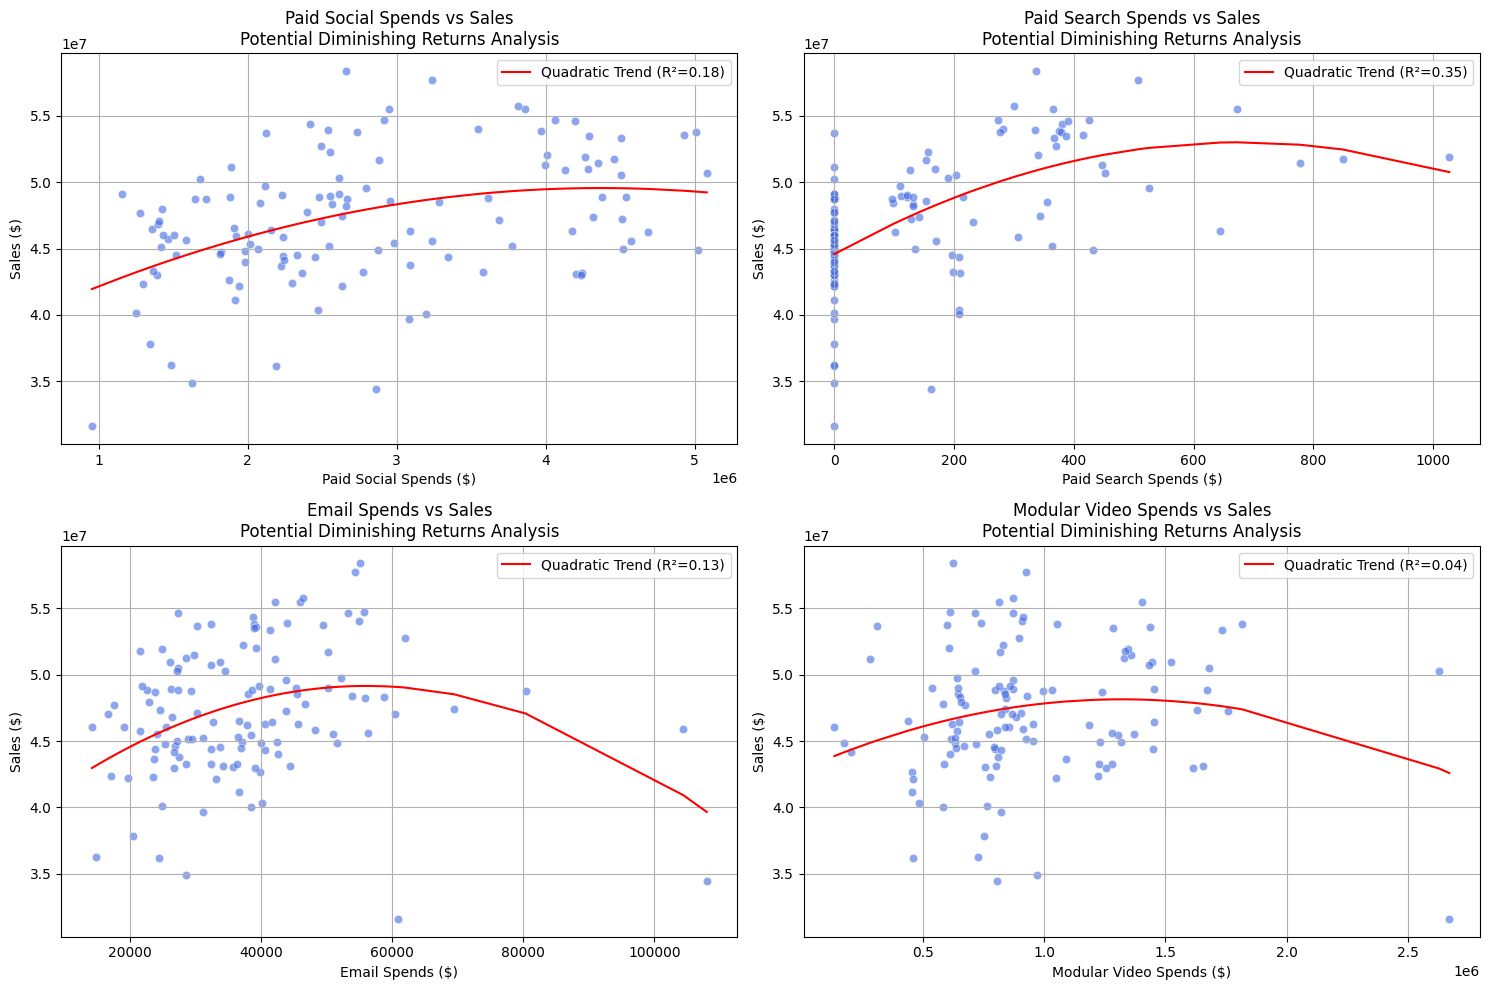

In [ ]:
spend_columns = ['Paid Social Spends', 'Paid Search Spends','Email Spends', 'Modular Video Spends']

plt.figure(figsize=(15, 10))
for i, channel in enumerate(spend_columns, 1):
    plt.subplot(2, 2, i)

    sns.scatterplot(data=df, x=channel, y='Sales', alpha=0.6, color='royalblue')
    x = df[channel].values.reshape(-1, 1)
    y = df['Sales'].values
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(x)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)
    
    sorted_idx = np.argsort(x.ravel())
    plt.plot(x[sorted_idx], y_pred[sorted_idx], color='red',label=f'Quadratic Trend (R²={r2_score(y, y_pred):.2f})')

    plt.title(f'{channel} vs Sales\nPotential Diminishing Returns Analysis')
    plt.xlabel(f'{channel} ($)')
    plt.ylabel('Sales ($)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

# Feature Engineering

In [73]:
df['Week_Ending']=pd.to_datetime(df['Week_Ending'])
df=df.sort_values('Week_Ending')

In [74]:
df = df.assign(
    month=lambda x: x['Week_Ending'].dt.month,
    dayofyear=lambda x: x['Week_Ending'].dt.dayofyear,
    week=lambda x: x['Week_Ending'].dt.isocalendar().week
)

df.columns = [col.replace(' ', '_') for col in df.columns]

In [75]:
media_channels = {
    'Email_Spends': {'alpha': 0.4, 'lambda': 4.0},
    'Modular_Video_Spends': {'alpha': 0.3, 'lambda': 3.0},
    'Paid_Social_Spends': {'alpha': 0.5, 'lambda': 2.5},
    'Paid_Search_Spends': {'alpha': 0.4, 'lambda': 3.5}
    }

print("Media channels and parameters:")
for channel, params in media_channels.items():
    print(f"{channel}: alpha={params['alpha']} (adstock), lambda={params['lambda']} (saturation)")

Media channels and parameters:
Email_Spends: alpha=0.4 (adstock), lambda=4.0 (saturation)
Modular_Video_Spends: alpha=0.3 (adstock), lambda=3.0 (saturation)
Paid_Social_Spends: alpha=0.5 (adstock), lambda=2.5 (saturation)
Paid_Search_Spends: alpha=0.4 (adstock), lambda=3.5 (saturation)


In [86]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'x' is your DataFrame containing the predictor columns used in the heatmap
# Define the list of columns to check VIF for (channels + controls)
predictor_columns = [
    'Paid_Search_Spends',
    'Email_Spends',
    'Paid_Social_Spends',
    'Modular_Video_Spends',
    'Discount1',
    'Discount2',
    'Holiday_Dummy',
    'Total_SKU',
    'Gasoline_Price',
    # Add 'day_of_year' if you included it in the heatmap/model predictors directly
    # Generally, cyclical features like day_of_year fourier terms are less of a concern
    # unless directly correlated with other controls.
]

# Select only the relevant columns from your features DataFrame 'x'
X_for_vif = df[predictor_columns]

# Drop rows with NaN values if any, as VIF calculation cannot handle them
X_for_vif = X_for_vif.dropna()

# Add a constant (intercept) term for the VIF calculation
X_with_const = add_constant(X_for_vif, prepend=False) # Added to the end

# Add a constant (intercept) term for the VIF calculation
X_with_const = add_constant(X_for_vif, prepend=False)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print("Variance Inflation Factor (VIF):")
# Sort by VIF score descending to easily see the highest values
print(vif_data.sort_values(by='VIF', ascending=False))

Variance Inflation Factor (VIF):
                feature         VIF
9                 const  293.016536
7             Total_SKU    2.966217
8        Gasoline_Price    2.095693
2    Paid_Social_Spends    2.088553
0    Paid_Search_Spends    1.465611
3  Modular_Video_Spends    1.456299
1          Email_Spends    1.446003
6         Holiday_Dummy    1.440290
5             Discount2    1.219381
4             Discount1    1.170642


In [77]:
for channel, params in media_channels.items():
    # Apply geometric adstock (carryover effect)
    df[f"{channel}_adstock"] = (
        geometric_adstock(
            x=df[channel].to_numpy(), 
            alpha=params['alpha'], 
            l_max=8,  # Max lag of 8 weeks
            normalize=True
        )
        .eval()
        .flatten()
    )
    
    df[f"{channel}_adstock_saturated"] = logistic_saturation(
        x=df[f"{channel}_adstock"].to_numpy(), 
        lam=params['lambda']
    ).eval()

channel = 'Email_Spends'
df[[channel, f"{channel}_adstock", f"{channel}_adstock_saturated"]].head()

,Email_Spends,Email_Spends_adstock,Email_Spends_adstock_saturated
0,46008.276537,27623.068976,1.0
1,54354.736119,43683.456430,1.0
2,54933.564597,50455.136253,1.0
3,46371.965227,48023.479794,1.0
4,55065.842423,52270.564341,1.0


In [ ]:
channel_names = list(media_channels.keys())
fig, axes = plt.subplots(nrows=len(channel_names), ncols=3, 
                         figsize=(18, 4*len(channel_names)),
                         sharex=True)

for i, channel in enumerate(channel_names):
    # Plot raw data
    sns.lineplot(x="Week_Ending", y=channel, data=df, 
                 color=f"C{i}", ax=axes[i, 0])
    axes[i, 0].set_title(f"Raw {channel}")
    
    # Plot adstocked data
    sns.lineplot(x="Week_Ending", y=f"{channel}_adstock", data=df, 
                 color=f"C{i}", ax=axes[i, 1])
    axes[i, 1].set_title(f"{channel} with Adstock")
    
    # Plot saturated data
    sns.lineplot(x="Week_Ending", y=f"{channel}_adstock_saturated", data=df, 
                 color=f"C{i}", ax=axes[i, 2])
    axes[i, 2].set_title(f"{channel} with Adstock & Saturation")
    
plt.tight_layout()
plt.show()

In [78]:
# Create trend component (simple time index)
n = df.shape[0]
df['time_index'] = np.arange(n)  # Linear trend
df['log_time'] = np.log(np.arange(1, n+1))  # Log trend

# Create seasonality components
df['sin_yearly'] = np.sin(2 * np.pi * df['dayofyear'] / 365.25)
df['cos_yearly'] = np.cos(2 * np.pi * df['dayofyear'] / 365.25)

# Add week-of-year seasonality
df['sin_weekly'] = np.sin(2 * np.pi * df['week'] / 52.0)
df['cos_weekly'] = np.cos(2 * np.pi * df['week'] / 52.0)

# Check the trend and seasonality components
print("Time components added:")
time_cols = ['time_index', 'log_time', 'sin_yearly', 'cos_yearly', 'sin_weekly', 'cos_weekly']
df[time_cols].head()

Time components added:


,time_index,log_time,sin_yearly,cos_yearly,sin_weekly,cos_weekly
0,0,0.000000,0.580455,0.814292,0.568065,0.822984
1,1,0.693147,0.674069,0.738668,0.663123,0.748511
2,2,1.098612,0.757922,0.652346,0.748511,0.663123
3,3,1.386294,0.830797,0.556576,0.822984,0.568065
4,4,1.609438,0.891640,0.452745,0.885456,0.464723


In [54]:
columns_to_keep = ['Week_Ending','Sales','Holiday_Dummy','Gasoline_Price','Average_Price','dayofyear','trend','sin_yearly','cos_yearly','sin_weekly','cos_weekly']

media_channels = ['Email_Spends', 'Modular_Video_Spends','Paid_Social_Spends', 'Paid_Search_Spends']

for channel in media_channels:
    columns_to_keep.append(channel)
    columns_to_keep.append(f"{channel}_adstock")
    columns_to_keep.append(f"{channel}_adstock_saturated")

modeling_data = df[columns_to_keep].copy() 

modeling_data.columns

Index(['Week_Ending', 'Sales', 'Holiday_Dummy', 'Gasoline_Price',
       'Average_Price', 'dayofyear', 'trend', 'sin_yearly', 'cos_yearly',
       'sin_weekly', 'cos_weekly', 'Email_Spends', 'Email_Spends_adstock',
       'Email_Spends_adstock_saturated', 'Modular_Video_Spends',
       'Modular_Video_Spends_adstock',
       'Modular_Video_Spends_adstock_saturated', 'Paid_Social_Spends',
       'Paid_Social_Spends_adstock', 'Paid_Social_Spends_adstock_saturated',
       'Paid_Search_Spends', 'Paid_Search_Spends_adstock',
       'Paid_Search_Spends_adstock_saturated'],
      dtype='object')

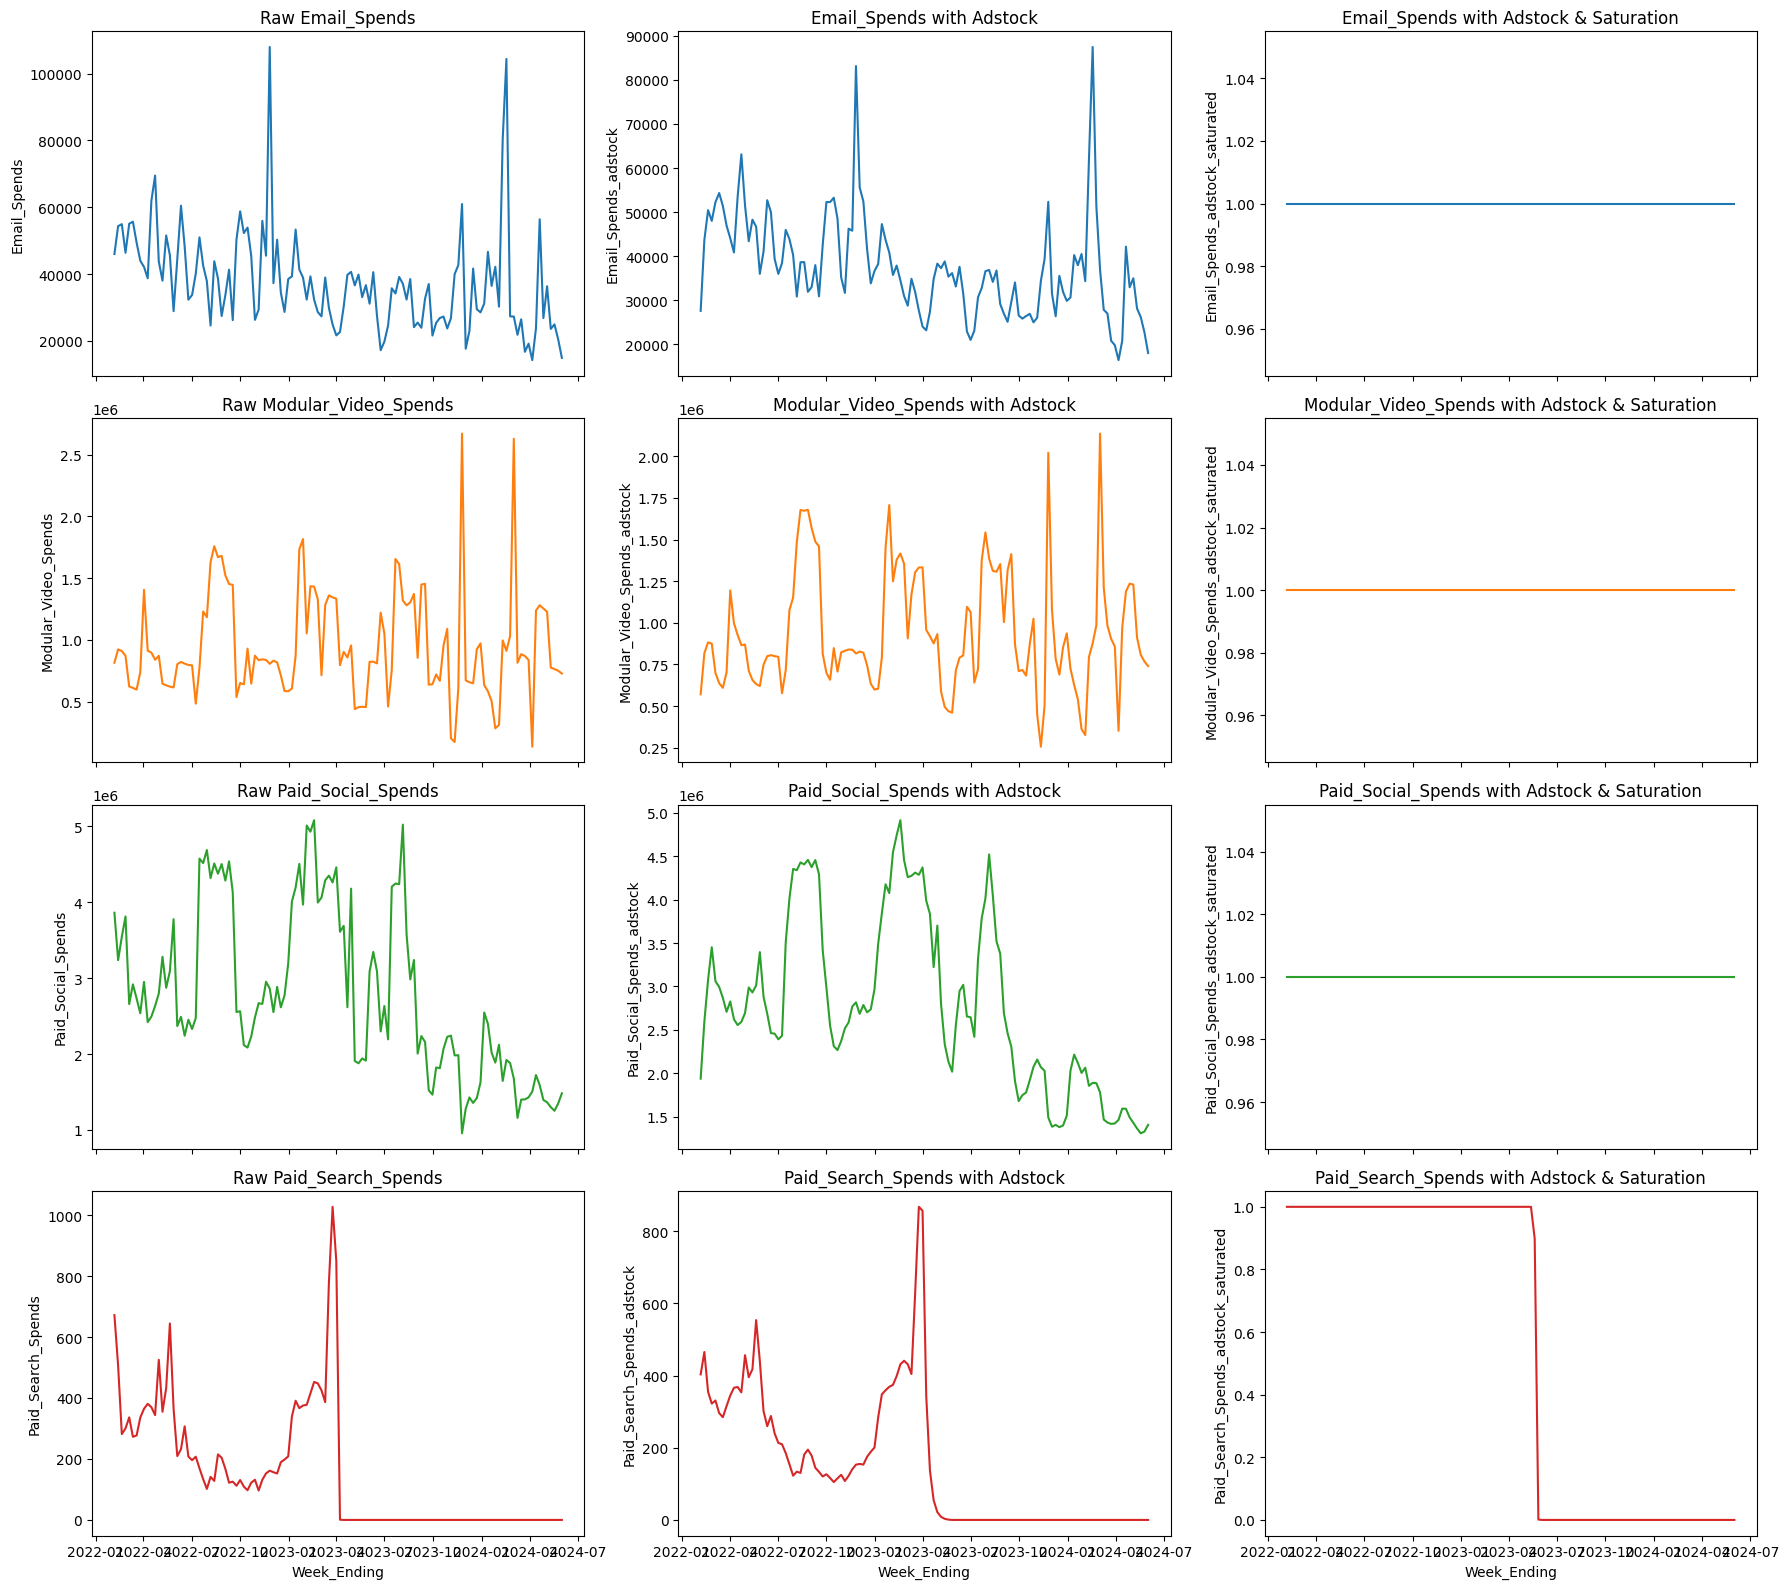

In [37]:
import datetime

df['dayofyear'] = df['Week_Ending'].dt.dayofyear
df

,Department,Week_Ending,Year,MAT,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,...,Modular Video Impressions,Modular Video Spends,Paid Social Impressions,Paid Social Spends,Paid Search Impressions,Paid Search Spends,Holiday Paid Social,Holiday Modular Video,Holiday Email,dayofyear
0,Brand A,2022-02-05,FY_2022,MAT_2022,5.549708e+07,0.039253,0.015600,0,29882443.5,1070.8565,...,11599332.5,8.152210e+05,280464068.5,3.861346e+06,6779.5,671.943906,0.0,0.0,0.0,36
1,Brand A,2022-02-12,FY_2022,MAT_2022,5.773779e+07,0.037425,0.014623,0,29719511.5,1070.8565,...,13142160.5,9.236536e+05,235058652.5,3.236218e+06,5110.0,506.472949,0.0,0.0,0.0,43
2,Brand A,2022-02-19,FY_2022,MAT_2022,5.404445e+07,0.061313,0.010034,0,29353173.5,1070.8565,...,12949660.5,9.101243e+05,257480818.0,3.544920e+06,2842.0,281.682216,0.0,0.0,0.0,50
3,Brand A,2022-02-26,FY_2022,MAT_2022,5.577581e+07,0.066293,0.023455,0,29324354.5,1070.8565,...,12401567.5,8.716034e+05,276892035.0,3.812168e+06,3031.0,300.414777,0.0,0.0,0.0,57
4,Brand A,2022-03-05,FY_2022,MAT_2022,5.839206e+07,0.047306,0.015688,0,29192688.0,1282.7465,...,8857677.5,6.225327e+05,193081850.5,2.658294e+06,3395.0,336.492302,0.0,0.0,0.0,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Brand A,2024-05-04,FY_2024,MAT_2024,4.329954e+07,0.072005,0.048122,0,24330285.0,1128.5190,...,17464296.5,1.227421e+06,99109724.0,1.364513e+06,0.0,0.000000,0.0,0.0,0.0,125
118,Brand A,2024-05-11,FY_2024,MAT_2024,4.231364e+07,0.052595,0.342303,0,24294714.5,1123.4335,...,11039213.5,7.758548e+05,94435820.5,1.300164e+06,0.0,0.000000,0.0,0.0,0.0,132
119,Brand A,2024-05-18,FY_2024,MAT_2024,4.011042e+07,0.051634,0.136933,0,24298113.0,1123.4335,...,10867983.0,7.638205e+05,90986511.0,1.252675e+06,0.0,0.000000,0.0,0.0,0.0,139
120,Brand A,2024-05-25,FY_2024,MAT_2024,3.783654e+07,0.058609,0.137453,0,24399693.5,1123.4335,...,10679399.5,7.505665e+05,97938928.5,1.348394e+06,0.0,0.000000,0.0,0.0,0.0,146


In [38]:
columns_to_drop=['Department','Year','MAT','Organic Search Impressions', 'Modular Video Impressions', 'Paid Social Impressions', 'Paid Search Impressions']

df.drop(columns_to_drop,axis=1,inplace=True)

In [39]:
df.insert(1, 'day_of_year', df['dayofyear'])
del df['dayofyear']

In [40]:
df.head()

,Week_Ending,day_of_year,Sales,Discount1,Discount2,Holiday Dummy,Total SKU,Gasoline Price,Average Price,Email Clicks,Email Spends,Modular Video Spends,Paid Social Spends,Paid Search Spends,Holiday Paid Social,Holiday Modular Video,Holiday Email
0,2022-02-05,36,5.549708e+07,0.039253,0.015600,0,29882443.5,1070.8565,17.716258,534418.5,46008.276537,815220.956832,3.861346e+06,671.943906,0.0,0.0,0.0
1,2022-02-12,43,5.773779e+07,0.037425,0.014623,0,29719511.5,1070.8565,17.720041,631368.5,54354.736119,923653.551413,3.236218e+06,506.472949,0.0,0.0,0.0
2,2022-02-19,50,5.404445e+07,0.061313,0.010034,0,29353173.5,1070.8565,17.774548,638092.0,54933.564597,910124.321676,3.544920e+06,281.682216,0.0,0.0,0.0
3,2022-02-26,57,5.577581e+07,0.066293,0.023455,0,29324354.5,1070.8565,17.771519,538643.0,46371.965227,871603.406796,3.812168e+06,300.414777,0.0,0.0,0.0
4,2022-03-05,64,5.839206e+07,0.047306,0.015688,0,29192688.0,1282.7465,17.842527,639628.5,55065.842423,622532.747195,2.658294e+06,336.492302,0.0,0.0,0.0


In [41]:
spend_share=total_spend_per_channel/(total_spend_per_channel.sum())
n_channels=len(channels)
prior_sigma = n_channels*spend_share.to_numpy()
print(prior_sigma.tolist())

[0.00016, 0.04, 2.95984, 1.0000000000000002]


# Modelling

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from pymc_marketing.mmm import MMM, GeometricAdstock, LogisticSaturation
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation
from pymc_marketing.prior import Prior
import arviz as az

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.dpi"] = 100


x=df.drop('Sales',axis=1)
y=df['Sales']

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [43]:
my_model_config = {
    "intercept": Prior("Normal", mu=0.5, sigma=0.2),
    "saturation_beta": Prior("HalfNormal", sigma=prior_sigma),
    "gamma_control": Prior("Normal", mu=0, sigma=0.05),
    "gamma_fourier": Prior("Laplace", mu=0, b=0.2),
    "likelihood": Prior("Normal", sigma=Prior("HalfNormal", sigma=6)),
}

my_sampler_config = {"progressbar": True}

In [45]:
mmm = MMM(
    model_config=my_model_config,
    sampler_config=my_sampler_config,
    date_column="Week_Ending", 
    adstock=GeometricAdstock(l_max=8),  
    saturation=LogisticSaturation(),
    channel_columns=channels,
    control_columns=["day_of_year", "Discount1", "Discount2", "Holiday Dummy", "Total SKU", "Gasoline Price", "Average Price"],
    yearly_seasonality=4,
)

In [46]:
mmm.sample_prior_predictive(x, y, samples=2000)

Sampling: [adstock_alpha, gamma_control, gamma_fourier, intercept, saturation_beta, saturation_lam, y, y_sigma]


<xarray.Dataset> Size: 2MB
Dimensions:  (date: 122, sample: 2000)
Coordinates:
  * date     (date) datetime64[ns] 976B 2022-02-05 2022-02-12 ... 2024-06-01
  * sample   (sample) object 16kB MultiIndex
  * chain    (sample) int32 8kB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * draw     (sample) int32 8kB 0 1 2 3 4 5 6 ... 1994 1995 1996 1997 1998 1999
Data variables:
    y        (date, sample) float64 2MB 1.817e+05 -2.111e+06 ... -6.202e+04
Attributes:
    created_at:                 2025-04-02T05:14:39.570131+00:00
    arviz_version:              0.21.0
    inference_library:          pymc
    inference_library_version:  5.21.1

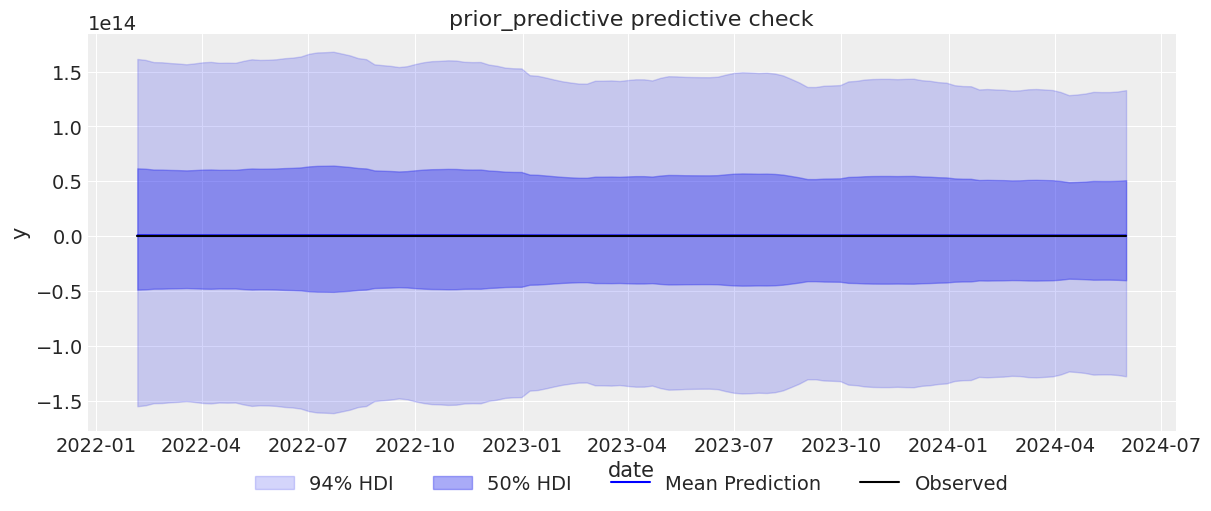

In [47]:
fig, ax = plt.subplots()
mmm.plot_prior_predictive(ax=ax, original_scale=True)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.2), ncol=4)

In [53]:
# %pip install jax jaxlib numpyro
import jax
jax.config.update("jax_enable_x64", True)


In [54]:
import jax.numpy as jnp
import numpy as np
rng = np.random.default_rng(42)

mmm.fit(X=x, y=y, chains=4, target_accept=0.85, nuts_sampler="numpyro", random_seed=rng)

Compiling.. :   0%|          | 0/2000 [00:00<?, ?it/s]







XlaRuntimeError: FAILED_PRECONDITION: Buffer Definition Event: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: CpuCallback error: Traceback (most recent call last):
  File "c:\Users\Naveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\callback.py", line 791, in _wrapped_callback
RuntimeError: Incorrect output dtype for return value #0: Expected: int64, Actual: int32

In [55]:
import jax
jax.config.update("jax_enable_x64", True)


# Convert all numeric columns to float64 (including controls and channels)
for col in x.columns:
    if col != "Week_Ending":  # Keep date column as datetime
        x[col] = x[col].astype(np.float64)

# Explicitly convert target to float64
y = y.astype(np.float64)
x['day_of_year'] = x['day_of_year'].astype(np.int64)

# Add this before fitting to verify dtypes
print("\nFinal Data Types:")
print(x.dtypes)

# Now fit the model
mmm.fit(X=x, y=y, chains=4, target_accept=0.85, nuts_sampler="numpyro", random_seed=rng)


Final Data Types:
Week_Ending              datetime64[ns]
day_of_year                       int64
Discount1                       float64
Discount2                       float64
Holiday Dummy                   float64
Total SKU                       float64
Gasoline Price                  float64
Average Price                   float64
Email Clicks                    float64
Email Spends                    float64
Modular Video Spends            float64
Paid Social Spends              float64
Paid Search Spends              float64
Holiday Paid Social             float64
Holiday Modular Video           float64
Holiday Email                   float64
dtype: object


Compiling.. :   0%|          | 0/2000 [00:00<?, ?it/s]







XlaRuntimeError: FAILED_PRECONDITION: Buffer Definition Event: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: Error dispatching computation: CpuCallback error: Traceback (most recent call last):
  File "c:\Users\Naveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\jax\_src\callback.py", line 791, in _wrapped_callback
RuntimeError: Incorrect output dtype for return value #0: Expected: int64, Actual: int32